In [5]:
# Import pandas library
import pandas as pd

# Load the correct CSV file (not Excel)
df = pd.read_csv("activities_cleaned 1.csv")

# Convert timestamp columns to datetime
df['Begin Timestamp'] = pd.to_datetime(df['Begin Timestamp'], errors='coerce')
df['End Timestamp'] = pd.to_datetime(df['End Timestamp'], errors='coerce')

# Calculate duration in minutes
df['Workout Duration (min)'] = (df['End Timestamp'] - df['Begin Timestamp']).dt.total_seconds() / 60

# Drop rows with missing timestamps
df_cleaned = df.dropna(subset=['Begin Timestamp', 'End Timestamp'])

# Show the first few rows
df_cleaned.head()


,Activity ID,Activity Type,Begin Timestamp,End Timestamp,Max. Elevation (Raw),Min. Elevation (Raw),Elevation Gain (Raw),Elevation Loss (Raw),Average Heart Rate (bpm),Max. Heart Rate (bpm).1,...,Begin Longitude (Decimal Degrees Raw),End Latitude (Decimal Degrees Raw),End Longitude (Decimal Degrees Raw),Temperature (Raw),Wind Speed (Raw),Wind Direction,Humidity (Raw),Condition,Rainfall,Workout Duration (min)
0,2284658991,Running,2017-04-11 12:07:00,2017-04-11 13:06:00,472.6,472.6,315.0,314.0,182,113,...,7.856356,48.019369,7.855831,13.9,11,S,77,fair,no,59.0
1,2284658936,Running,2017-03-11 09:47:00,2017-03-11 10:35:00,473.2,473.2,245.0,244.0,177,100,...,7.881881,48.019410,7.855922,11.1,3,N,100,fair,no,48.0
4,2084195352,Running,2017-02-10 14:51:00,2017-02-10 15:38:00,494.6,494.6,246.0,240.0,174,110,...,7.857145,48.019371,7.856066,17.8,19,SW,77,mostly cloudy,no,47.0
9,1971778346,Running,2017-10-09 13:45:00,2017-10-09 14:54:00,464.2,464.2,319.0,320.0,174,123,...,7.879863,48.019402,7.855888,18.9,10,SSW,56,fair,no,69.0
10,1959936581,Running,2017-05-09 15:32:00,2017-05-09 16:17:00,438.0,438.0,197.0,197.0,176,86,...,7.876742,48.019480,7.855915,26.1,11,SSW,48,fair,no,45.0


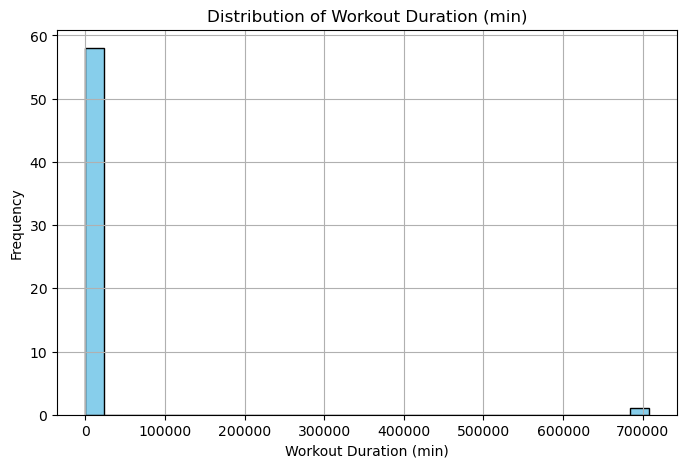

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.hist(df_cleaned['Workout Duration (min)'], bins=30, color='skyblue', edgecolor='black')
plt.title("Distribution of Workout Duration (min)")
plt.xlabel("Workout Duration (min)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


In [7]:
df_cleaned['Workout Duration (min)'].describe()


count        59.000000
mean      12034.406780
std       92115.426694
min          19.000000
25%          27.000000
50%          39.000000
75%          48.500000
max      707594.000000
Name: Workout Duration (min), dtype: float64

In [8]:
# Filter out unrealistic workout durations (e.g., > 1000 min)
df_filtered = df_cleaned[df_cleaned['Workout Duration (min)'] < 1000]


df_filtered['Workout Duration (min)'].describe()


count     58.00000
mean      42.00000
std       20.99624
min       19.00000
25%       27.00000
50%       39.00000
75%       48.00000
max      137.00000
Name: Workout Duration (min), dtype: float64

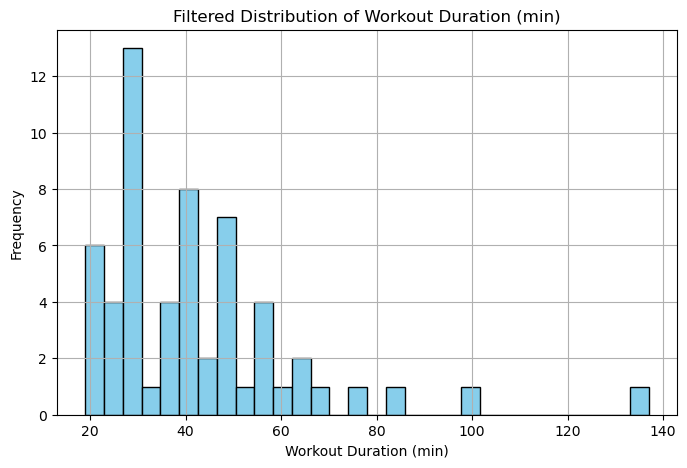

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.hist(df_filtered['Workout Duration (min)'], bins=30, color='skyblue', edgecolor='black')
plt.title("Filtered Distribution of Workout Duration (min)")
plt.xlabel("Workout Duration (min)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


We loaded and cleaned the activity dataset, converted timestamp columns, calculated workout duration in minutes, and removed missing values. A histogram of workout durations revealed extreme outliers, which were then filtered out to analyze the realistic distribution.
